In [12]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Define the structure
model = BayesianModel([
    ('Meteor on collision', 'Meteor strikes Earth'),
    ('Explode meteor', 'Meteor strikes Earth'),
    ('Meteor strikes Earth', 'Loss of life'),
    ('Move people', 'Loss of life')
])

cpd_meteor_on_collision = TabularCPD(
    variable='Meteor on collision', 
    variable_card=2,
    values=[[0.001], [0.999]]
)

cpd_explode_meteor = TabularCPD(
    variable='Explode meteor', 
    variable_card=2,
    values=[[0.99], [0.01]]
)

cpd_meteor_strikes_earth = TabularCPD(
    variable='Meteor strikes Earth', 
    variable_card=2, 
    values=[
        [0.999, 0.01, 0.999, 0.01],
        [0.001, 0.99, 0.001, 0.99]
    ],
    evidence=['Meteor on collision', 'Explode meteor'],
    evidence_card=[2, 2]
)

cpd_move_people = TabularCPD(
    variable='Move people', 
    variable_card=2,
    values=[[0.7], [0.3]]
)

cpd_loss_of_life = TabularCPD(
    variable='Loss of life', 
    variable_card=2, 
    values=[
        [0.999, 0.7, 0.999, 0.7],
        [0.001, 0.3, 0.001, 0.3]
    ],
    evidence=['Meteor strikes Earth', 'Move people'],
    evidence_card=[2, 2]
)

# Add the CPDs to the model
model.add_cpds(
    cpd_meteor_on_collision, 
    cpd_explode_meteor, 
    cpd_meteor_strikes_earth,
    cpd_move_people,
    cpd_loss_of_life
)

# Verify the model
assert model.check_model()

/tmp/ipykernel_111154/1747509676.py:24: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cpd_meteor_strikes_earth = TabularCPD(
/tmp/ipykernel_111154/1747509676.py:41: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cpd_loss_of_life = TabularCPD(


In [5]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Define the structure
model = BayesianModel([
    ("Rainfall", "Flood"),
    ("Quality of flood barriers", "Flood"),
    ("Availability of sandbags", "Flood"),
    ("River water level", "Flood"),
    ("Flood", "People drown"),
    ("Flood", "Houses ruined"),
    ("Quality of emergency services", "People drown")
])

# Hypothetical CPDs
cpd_rainfall = TabularCPD("Rainfall", 2, [[0.6], [0.4]])
cpd_quality_barriers = TabularCPD("Quality of flood barriers", 2, [[0.7], [0.3]])
cpd_sandbags = TabularCPD("Availability of sandbags", 2, [[0.8], [0.2]])
cpd_river_level = TabularCPD("River water level", 2, [[0.55], [0.45]])
cpd_flood = TabularCPD(variable='Flood', variable_card=2, 
                       evidence=['Rainfall', 'Quality of flood barriers', 'Availability of sandbags', 'River water level'],
                       evidence_card=[2, 2, 2, 2],
                       values=[[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97],
                               [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03]])
cpd_emergency = TabularCPD("Quality of emergency services", 2, [[0.85], [0.15]])
cpd_people_drown = TabularCPD(variable='People drown', variable_card=2, 
                             evidence=['Flood', 'Quality of emergency services'],
                             evidence_card=[2, 2],
                             values=[[0.9, 0.7, 0.8, 0.5],
                                     [0.1, 0.3, 0.2, 0.5]])
cpd_houses_ruined = TabularCPD(variable="Houses ruined", variable_card=2,
                              evidence=['Flood'],
                              evidence_card=[2],
                              values=[[0.7, 0.2],
                                      [0.3, 0.8]])

# Add the CPDs to the model
model.add_cpds(cpd_rainfall, cpd_quality_barriers, cpd_sandbags, cpd_river_level, cpd_flood, cpd_emergency, cpd_people_drown, cpd_houses_ruined)

# Verify the model
assert model.check_model(), "Model has an error"

/tmp/ipykernel_111154/474936289.py:20: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cpd_flood = TabularCPD(variable='Flood', variable_card=2,
/tmp/ipykernel_111154/474936289.py:26: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cpd_people_drown = TabularCPD(variable='People drown', variable_card=2,
/tmp/ipykernel_111154/474936289.py:31: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cpd_houses_ruined = TabularCPD(variable="Houses ruined", variable_card=2,


In [14]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Define the structure
model = BayesianModel([
    ("Rainfall", "Flood"),
    ("Quality of flood barriers", "Flood"),
    ("Availability of sandbags", "Flood"),
    ("River water level", "Flood"),
    ("Flood", "People drown"),
    ("Flood", "Houses ruined"),
    ("Quality of emergency services", "People drown")
])

# Hypothetical CPDs
cpd_rainfall = TabularCPD("Rainfall", 2, [[0.6], [0.4]])
cpd_quality_barriers = TabularCPD("Quality of flood barriers", 2, [[0.7], [0.3]])
cpd_sandbags = TabularCPD("Availability of sandbags", 2, [[0.8], [0.2]])
cpd_river_level = TabularCPD("River water level", 2, [[0.55], [0.45]])
cpd_flood = TabularCPD(variable='Flood', variable_card=2, 
                       evidence=['Rainfall', 'Quality of flood barriers', 'Availability of sandbags', 'River water level'],
                       evidence_card=[2, 2, 2, 2],
                       values=[[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97],
                               [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03]])
cpd_emergency = TabularCPD("Quality of emergency services", 2, [[0.85], [0.15]])
cpd_people_drown = TabularCPD(variable='People drown', variable_card=2, 
                             evidence=['Flood', 'Quality of emergency services'],
                             evidence_card=[2, 2],
                             values=[[0.9, 0.7, 0.8, 0.5],
                                     [0.1, 0.3, 0.2, 0.5]])
cpd_houses_ruined = TabularCPD(variable="Houses ruined", variable_card=2,
                              evidence=['Flood'],
                              evidence_card=[2],
                              values=[[0.7, 0.2],
                                      [0.3, 0.8]])

# Add the CPDs to the model
model.add_cpds(cpd_rainfall, cpd_quality_barriers, cpd_sandbags, cpd_river_level, cpd_flood, cpd_emergency, cpd_people_drown, cpd_houses_ruined)

# Verify the model
assert model.check_model(), "Model has an error"

/tmp/ipykernel_111154/474936289.py:20: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cpd_flood = TabularCPD(variable='Flood', variable_card=2,
/tmp/ipykernel_111154/474936289.py:26: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cpd_people_drown = TabularCPD(variable='People drown', variable_card=2,
/tmp/ipykernel_111154/474936289.py:31: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cpd_houses_ruined = TabularCPD(variable="Houses ruined", variable_card=2,


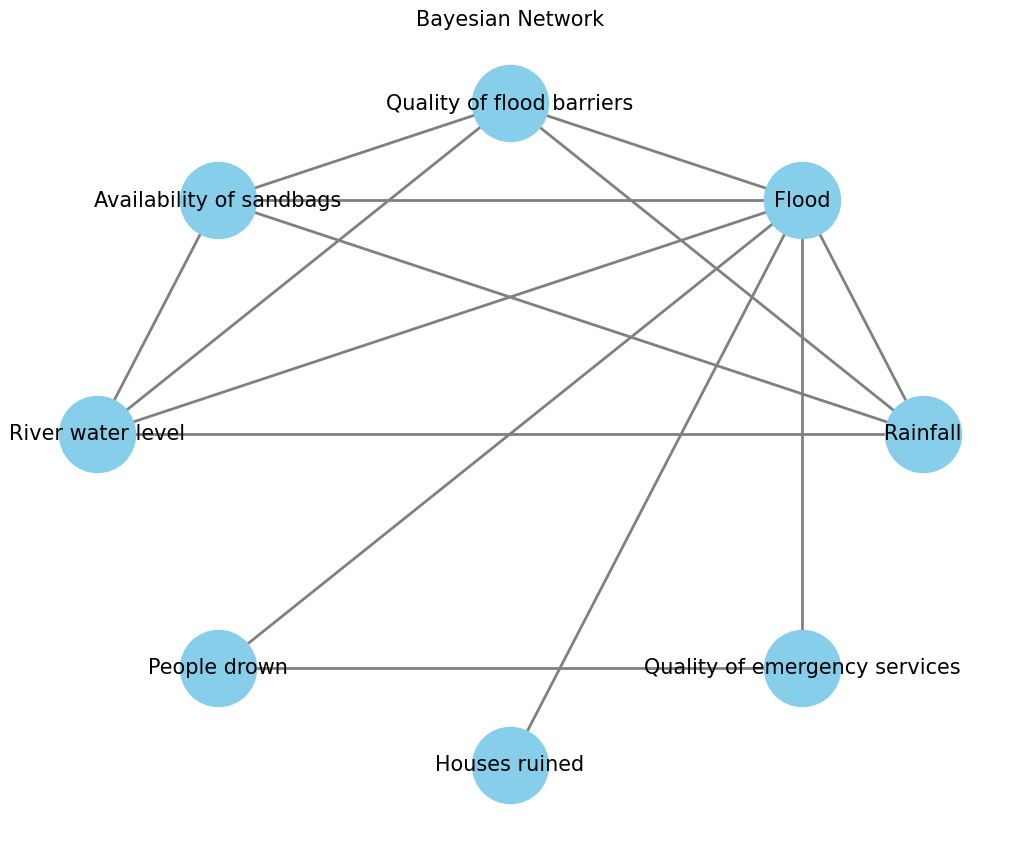

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_bayesian_model(model):
    nx_graph = model.to_markov_model()  # Convert the Bayesian model to a Markov model to utilize networkx functionality
    pos = nx.circular_layout(nx_graph)
    plt.figure(figsize=(10, 8))
    
    nx.draw(nx_graph, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, width=2, edge_color='gray', arrowsize=20)
    plt.title('Bayesian Network', size=15)
    plt.show()

# Visualize the model
plot_bayesian_model(model)

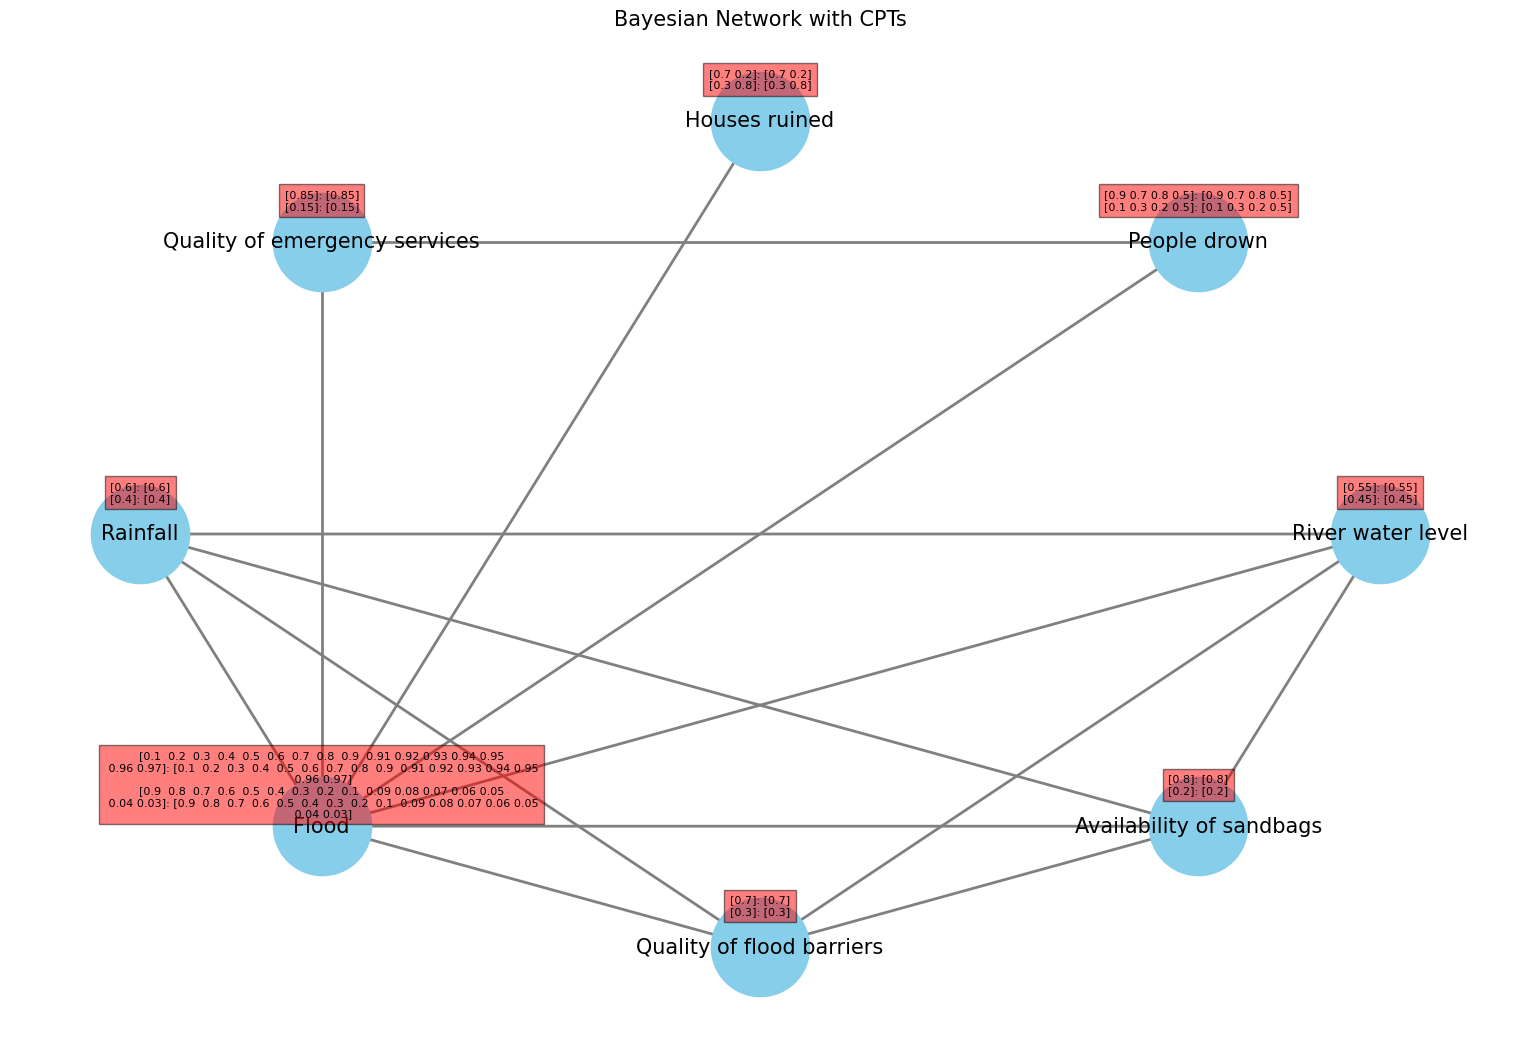

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_bayesian_model_with_cpt(model):
    # Create a new figure and set the size
    plt.figure(figsize=(15, 10))
    
    # Convert Bayesian model to Markov model for visualization
    nx_graph = model.to_markov_model()
    pos = nx.shell_layout(nx_graph)  # Switch to shell layout for our graph
    
    # Draw nodes and edges
    nx.draw(nx_graph, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=15, width=2, edge_color='gray', arrowsize=30)
    
    # For each node, fetch and draw the CPT
    for node in model.nodes():
        if model.get_cpds(node):
            table = model.get_cpds(node).get_values()
            table_str = "\n".join([f"{str(key)}: {str(value)}" for key, value in zip(table, table)])
            x, y = pos[node]
            plt.text(x, y+0.1, s=table_str, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center', verticalalignment='center', fontsize=8)

    # Set the title and display
    plt.title('Bayesian Network with CPTs', size=15)
    plt.show()

plot_bayesian_model_with_cpt(model)

In [17]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
posterior = infer.query(variables=['Houses ruined'], evidence={'Flood': 1})
print(posterior)

+------------------+----------------------+
| Houses ruined    |   phi(Houses ruined) |
+==================+======================+
| Houses ruined(0) |               0.2000 |
+------------------+----------------------+
| Houses ruined(1) |               0.8000 |
+------------------+----------------------+


/home/bulbul/micromamba/envs/cartopy-plot-20230919-t4/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [19]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import BayesianModelSampling

# Define the model structure and CPDs (using the flood model for simplicity)
model = BayesianModel([
    ("Rainfall", "Flood"),
    ("Quality of flood barriers", "Flood"),
    # ... (other edges)
])

cpd_rainfall = TabularCPD("Rainfall", 2, [[0.6], [0.4]])
cpd_flood = TabularCPD(variable='Flood', variable_card=2, 
                       evidence=['Rainfall', 'Quality of flood barriers'],
                       evidence_card=[2, 2],
                       values=[[0.1, 0.2, 0.3, 0.4],
                               [0.9, 0.8, 0.7, 0.6]])
# ... (other CPDs)

model.add_cpds(cpd_rainfall, cpd_flood)

# Use BayesianModelSampling to generate data
sampler = BayesianModelSampling(model)
data = sampler.forward_sample(size=1000)  # Generate 1000 samples

print(data.head())  # Display first few rows of generated data

/tmp/ipykernel_111154/1557504539.py:13: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cpd_flood = TabularCPD(variable='Flood', variable_card=2,


ValueError: No CPD associated with Quality of flood barriers

In [18]:
from pgmpy.estimators import MaximumLikelihoodEstimator
# Assuming 'data' is a pandas DataFrame with appropriate data
model.fit(data, estimator=MaximumLikelihoodEstimator)

NameError: name 'data' is not defined